In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import numpy as np


In [2]:
datafile_train=r'C:/Users/marshivane nagesh/Downloads/P1 Data/Consumer_Complaints_train.csv'
datafile_test=r'C:/Users/marshivane nagesh/Downloads/P1 Data/Consumer_Complaints_test_share.csv'
cd_train=pd.read_csv(datafile_train)
cd_test=pd.read_csv(datafile_test)

In [3]:
cd_train.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [4]:
for col in ['Date received','Date sent to company']:
    cd_train[col]=pd.to_datetime(cd_train[col],infer_datetime_format=True)
    cd_test[col]=pd.to_datetime(cd_test[col],infer_datetime_format=True)

In [5]:
cd_train['day_diff']=pd.to_numeric(cd_train['Date sent to company']-cd_train['Date received'])
cd_test['day_diff']=pd.to_numeric(cd_test['Date sent to company']-cd_test['Date received'])

In [6]:
for col in ['Date received','Date sent to company']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [7]:
for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Product : 12
Sub-product : 47
Issue : 95
Sub-issue : 68
Consumer complaint narrative : 74019
Company public response : 10
Company : 3276
State : 62
ZIP code : 25962
Tags : 3
Consumer consent provided? : 4
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [8]:
cd_train.isnull().sum()

Product                              0
Sub-product                     138473
Issue                                0
Sub-issue                       292625
Consumer complaint narrative    403327
Company public response         388029
Company                              0
State                             3839
ZIP code                          3848
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
day_diff                             0
dtype: int64

In [9]:
len(pd.isnull(cd_train['Tags']))
len(cd_train)

478421

In [10]:
for col in ['Sub-product','Sub-issue','Consumer complaint narrative',
            'Company public response','Tags','Consumer consent provided?']:
    varname=col.replace('-','_').replace('?','').replace(" ",'_')+'_isNan'
    cd_train[varname]=np.where(pd.isnull(cd_train[col]),1,0)
    cd_train.drop([col],1,inplace=True)
    cd_test[varname]=np.where(pd.isnull(cd_test[col]),1,0)
    cd_test.drop([col],1,inplace=True)
    

In [11]:
cd_train.head(4)

,Product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,day_diff,Sub_product_isNan,Sub_issue_isNan,Consumer_complaint_narrative_isNan,Company_public_response_isNan,Tags_isNan,Consumer_consent_provided_isNan
0,Credit card,Billing statement,Wells Fargo & Company,MI,48342,Web,Closed with explanation,Yes,No,856103,86400000000000,1,1,1,1,0,1
1,Bank account or service,"Making/receiving payments, sending money",Santander Bank US,PA,18042,Referral,Closed,Yes,No,1034666,518400000000000,0,1,1,1,1,1
2,Credit reporting,Incorrect information on credit report,Equifax,CA,92427,Referral,Closed with non-monetary relief,Yes,No,756363,1814400000000000,1,0,1,1,1,1
3,Credit card,Billing statement,U.S. Bancorp,GA,305XX,Web,Closed with monetary relief,Yes,No,1474177,0,1,1,0,0,0,0


In [12]:
for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Product : 12
Issue : 95
Company : 3276
State : 62
ZIP code : 25962
Submitted via : 6
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2


In [13]:
for col in ['ZIP code','Company']:
    cd_train.drop([col],1,inplace=True)
    cd_test.drop([col],1,inplace=True)

In [14]:
cd_train['Consumer disputed?']=np.where(cd_train['Consumer disputed?']=="Yes",1,0)

In [15]:
k=cd_train['Issue'].value_counts()
for val in k.axes[0][0:10]:
    varname='Issue_'+val.replace(',','_').replace(' ','_')
    cd_train[varname]=np.where(cd_train['Issue']==val,1,0)
    cd_test[varname]=np.where(cd_test['Issue']==val,1,0)
del cd_train['Issue']
del cd_test['Issue']

In [16]:
for col in cd_train.select_dtypes(['object']).columns:
    print(col,':',cd_train[col].nunique())

Product : 12
State : 62
Submitted via : 6
Company response to consumer : 7
Timely response? : 2


In [17]:
k=cd_train['State'].value_counts()
for val in k.axes[0][0:15]:
    varname='State_'+val.replace(',','_').replace(' ','_')
    cd_train[varname]=np.where(cd_train['State']==val,1,0)
    cd_test[varname]=np.where(cd_test['State']==val,1,0)
del cd_train['State']
del cd_test['State']

In [18]:
for col in ['Product','Submitted via','Company response to consumer','Timely response?']:
    
    temp=pd.get_dummies(cd_train[col],prefix=col,drop_first=True)
    cd_train=pd.concat([temp,cd_train],1)
    cd_train.drop([col],1,inplace=True)
    
    temp=pd.get_dummies(cd_test[col],prefix=col,drop_first=True)
    cd_test=pd.concat([temp,cd_test],1)
    cd_test.drop([col],1,inplace=True)


In [19]:
x=cd_train.drop(['Consumer disputed?','Complaint ID'],1)
y=cd_train['Consumer disputed?']

In [20]:
train, validation= train_test_split(cd_train, test_size=0.2, random_state=2)


In [21]:
x_train = train.drop(['Consumer disputed?','Complaint ID'],1)
y_train = train['Consumer disputed?']
x_validation = validation.drop(['Consumer disputed?','Complaint ID'],1)
y_validation = validation['Consumer disputed?']

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn import tree

In [24]:
%matplotlib inline


In [25]:
dtree = tree.DecisionTreeClassifier(criterion="entropy", 
                                    max_leaf_nodes=10, 
                                    class_weight="balanced",
                                    )

In [26]:
dtree.fit(x_train, y_train) 

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
tree.export_graphviz(dtree, out_file="decision_tree.dot",
                     feature_names=x_train.columns,
                     proportion=True)

In [28]:
predicted = dtree.predict(x_validation)
df_test = pd.DataFrame(list(zip(y_validation, predicted)), columns=["real", "predicted"])
k = pd.crosstab(df_test["real"], df_test["predicted"])
k

predicted,0,1
real,,
0,40382,35184
1,7731,12388


In [29]:
TP = k.iloc[1,1]
TN = k.iloc[0,0]
FP = k.iloc[0,1]
FN = k.iloc[1,0]
P = TP + FN
N = TN + FP

print("Accuracy: ", (TP+TN)/(P+N))
print("Sensitivity: ", TP/P)
print("Specificity: ", TN/N)

Accuracy:  0.551497099858912
Sensitivity:  0.6157363686067896
Specificity:  0.5343937749781648


In [30]:
max_nodes = list(range(5,23))

In [31]:
max_nodes

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [32]:
from sklearn.model_selection import KFold

In [33]:
beta=2
FB_avg = []
for max_node in max_nodes:
    mytree = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=max_node, class_weight="balanced")
    
    # computing average RMSE across 10-fold cross validation
    kf = KFold(n_splits=10)
    FB_total =[]
    for train_, test_ in kf.split(x_train):
#         print(train_)
#         print(x_train.iloc[train_])
        mytree.fit(x_train.iloc[train_], y_train.iloc[train_])
        p = mytree.predict(x_train.iloc[test_])
        df=pd.DataFrame(list(zip(y_train,p)),columns=["real","predicted"])
        TP=len(df[(df["real"]==1) &(df["predicted"]==1) ])
        FP=len(df[(df["real"]==0) &(df["predicted"]==1) ])
        TN=len(df[(df["real"]==0) &(df["predicted"]==0) ])
        FN=len(df[(df["real"]==1) &(df["predicted"]==0) ])
        P=TP+FN
        N=TN+FP
        Precision=TP/(TP+FP)
        Recall=TP/P
        
        FB = (1+beta**2)*Precision*Recall/((beta**2)*Precision + Recall)
        FB_total.extend([FB])
    FB_avg.extend([np.mean(FB_total)])
best_max_node = np.array(max_nodes)[FB_avg == max(FB_avg)][0]

print("max_node value with best F2 score is : ", best_max_node)

max_node value with best F2 score is :  5


In [34]:
dtree = tree.DecisionTreeClassifier(criterion="entropy",
                                    max_leaf_nodes=best_max_node,
                                    class_weight="balanced")
dtree.fit(x_train, y_train) 
predicted = dtree.predict(x_validation)
df_test = pd.DataFrame(list(zip(y_validation, predicted)), columns=["real", "predicted"])
k = pd.crosstab(df_test["real"], df_test["predicted"])
k

predicted,0,1
real,,
0,38948,36618
1,7431,12688


In [35]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

12688 38948 36618 7431
Accuracy is : 0.5396457124941213
Sensitivity is : 0.6306476465033053
Specificity is : 0.515416986475399


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from time import time
from operator import itemgetter
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV

In [38]:
clf = RandomForestClassifier(verbose=1, n_jobs=-1)

In [39]:
param_dist = {"n_estimators":[10, 100],
              "max_depth": [3,5, None],
             "max_features": randint(5,11),
             "min_samples_split": randint(5,11),
             "min_samples_leaf": randint(5,11),
             "bootstrap": [True, False],
             "criterion": ["gini", "entropy"]}

# how many hyperparam combination will be tried out of all possible
n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search)
random_search.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 o

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 o

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using 

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   51.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jo

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend Th

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs

In [40]:
def report(grid_scores, n_top=3):
    idx = np.array([[i] for i in range(1,n_top+1)])
    top_scores_idx = np.where(grid_scores["rank_test_score"] == idx)[1]
    for i, top_idx in enumerate(top_scores_idx):
        print("Model with rank: {0}".format(i+1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
            grid_scores["mean_test_score"][top_idx],
            np.std(grid_scores["std_test_score"][top_idx])))
        print("Parameters: {0}".format(grid_scores["params"][top_idx]))
        print("")

In [41]:
report(random_search.cv_results_, 3)

Model with rank: 1
Mean validation score: 0.788 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 6, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.788 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 9, 'min_samples_split': 9, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.788 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 8, 'n_estimators': 100}

Model with rank: 4
Mean validation score: 0.788 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 100}



In [42]:
rf=RandomForestClassifier(n_estimators=100,verbose=1,criterion='gini',min_samples_split=6,
                         bootstrap=False,max_depth=None,max_features=10,min_samples_leaf=5,
                          class_weight="balanced")

In [43]:
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.2min finished


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=6, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=1, warm_start=False)

In [44]:
predicted=rf.predict(x_validation)

df_test=pd.DataFrame(list(zip(y_validation,predicted)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print(k)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


predicted      0      1
real                   
0          41426  34140
1           7944  12175


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.6s finished


In [45]:
df_test

,real,predicted
0,0,0
1,1,0
2,0,0
3,0,1
4,0,0
...,...,...
95680,0,0
95681,0,0
95682,1,1
95683,0,0


In [46]:
TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

12175 41426 34140 7944
Accuracy is : 0.5601818466844333
Sensitivity is : 0.6051493613002634
Specificity is : 0.548209512214488


In [47]:
list(zip(x_train.columns,rf.feature_importances_))

[('Timely response?_Yes', 0.007477188495275345),
 ('Company response to consumer_Closed with explanation', 0.05901719475205963),
 ('Company response to consumer_Closed with monetary relief',
  0.045230318838477335),
 ('Company response to consumer_Closed with non-monetary relief',
  0.04990334147744469),
 ('Company response to consumer_Closed with relief', 0.004802054994544787),
 ('Company response to consumer_Closed without relief', 0.01294525641841856),
 ('Company response to consumer_Untimely response', 0.0),
 ('Submitted via_Fax', 0.006148079009512115),
 ('Submitted via_Phone', 0.009841364368351412),
 ('Submitted via_Postal mail', 0.013033416391276443),
 ('Submitted via_Referral', 0.01726992465359464),
 ('Submitted via_Web', 0.04875041797722481),
 ('Product_Consumer Loan', 0.005075789693235641),
 ('Product_Credit card', 0.00485740376257428),
 ('Product_Credit reporting', 0.009940295238676514),
 ('Product_Debt collection', 0.00963428248518417),
 ('Product_Money transfers', 0.0057637

In [48]:
import seaborn as sns
import statsmodels.api as sm


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.1s finished


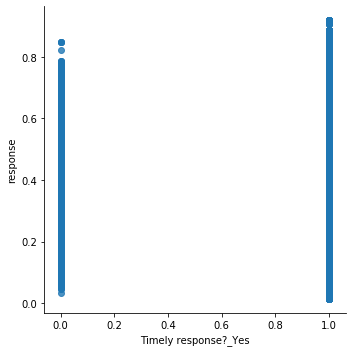

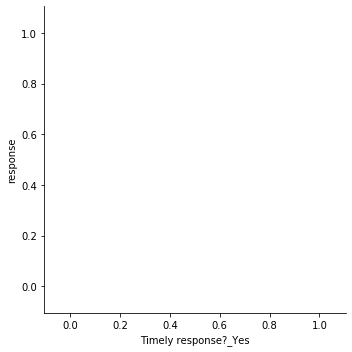

In [49]:
for var_name in ["Timely response?_Yes"]:
    preds = rf.predict_proba(x_train)[:,1]
    var_data = pd.DataFrame({var_name: x_train[var_name], "response": preds})
    # This will show a raw plot
    sns.lmplot(x=var_name,y="response", data=var_data, fit_reg=False)
    # We are smoothing the above plot to see how response varis with the change in value in x axis
    smooth_data = sm.nonparametric.lowess(var_data["response"], var_data[var_name])
    df = pd.DataFrame({"response": smooth_data[:,1], var_name:smooth_data[:,0]})
    sns.lmplot(x=var_name, y="response", data=df, fit_reg=False)

In [ ]:
clf=LogisticRegression()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={ 'class_weight':[None,'balanced'], 
        'criterion':['entropy','gini'],
        'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier()

In [ ]:
random_search=RandomizedSearchCV(clf,cv=10,
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 n_iter=20
                                    )

In [ ]:
random_search.fit(x_train,y_train)

In [ ]:
y_predi=random_search.fit(x_validation,y_validation)

In [ ]:
random_search.best_estimator_

In [ ]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_validation,y_pred))

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(random_search.cv_results_,5)

In [ ]:
dtree=random_search.best_estimator_

In [ ]:
dtree.fit(x_train,y_train)

In [ ]:
dotfile = open("mytree.dot", 'w')

tree.export_graphviz(dtree,out_file=dotfile,
                     feature_names=x_train.columns,
                    class_names=["0","1"],
                     proportion=True)
dotfile.close()

In [ ]:
from sklearn import tree

In [ ]:

from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
params = [
    {'penalty':['l2'],
         'C':np.logspace(-4,4,20),
         'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
         'max_iter':[100,1000,2500,5000]
    }
]   

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
blf = GridSearchCV(clf,param_grid=params,cv=10,verbose=True,n_jobs=-1)

In [ ]:
best_blf=blf.fit(x_train,y_train)

In [ ]:
prediction=np.where(clf.predict(cd_test.drop(['Complaint ID'],1))==1,"Yes","No")
submission=pd.DataFrame(list(zip(cd_test['Complaint ID'],list(prediction))),
                       columns=['Complaint ID','Consumer disputed?'])

In [ ]:
submission.head(4)

In [ ]:
submission.to_csv('sample_submission.csv',index=False)

This submission will get you auc score of approx 0.50, slightly less than whats required for passing the course. You'll have to make changes 